In [37]:
## read in csv file as dataframe

import pandas as pd
df = pd.read_csv("cleaned_cgga_693_clinical.csv")
df.head()

,sample_id,tumor_type,tumor_histology,tumor_grade,gender,age,survival_days,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,1002,P,anaplastic astrocyma,3,F,43.0,305.0,1.0,1.0,1.0,Wildtype,Non-codel
1,1003,P,oligodendroglioma,2,F,47.0,3817.0,0.0,0.0,1.0,Mutant,Codel
2,1010,P,astrocytoma,2,M,45.0,246.0,1.0,1.0,1.0,Mutant,Non-codel
3,1012,R,oligodendroglioma,2,M,45.0,3679.0,1.0,1.0,1.0,Mutant,Non-codel
4,1014,P,astrocytoma,2,M,42.0,263.0,1.0,0.0,1.0,Wildtype,Non-codel


In [38]:
## prepare data for ARM by transforming to transaction data without labels

#drop sample_id
df_2 = df.drop('sample_id', axis=1)

#remap tumor_type, tumor_grade, gender, survival_status, radio_status, and chemo_status to be more descriptive and unique

tumor_type_mapping = {'P': 'primary tumor', 'R': 'recurrent tumor'}
df_2['tumor_type'] = df_2['tumor_type'].replace(tumor_type_mapping)

tumor_grade_mapping = {2: 'grade 2', 3: 'grade 3', 4: 'grade 4'}
df_2['tumor_grade'] = df_2['tumor_grade'].replace(tumor_grade_mapping)

gender_mapping = {'M': 'Male', 'F': 'Female'}
df_2['gender'] = df_2['gender'].replace(gender_mapping)

survival_mapping = {1: 'deceased', 0: 'alive'}
df_2['survival_status'] = df_2['survival_status'].replace(survival_mapping)

radio_mapping = {1: 'radiation recieved', 0: 'no radiation received'}
df_2['radio_status'] = df_2['radio_status'].replace(radio_mapping)

chemo_mapping = {1: 'chemotherapy recieved', 0: 'no chemotherapy received'}
df_2['chemo_status'] = df_2['chemo_status'].replace(chemo_mapping)


<Axes: xlabel='age', ylabel='Count'>

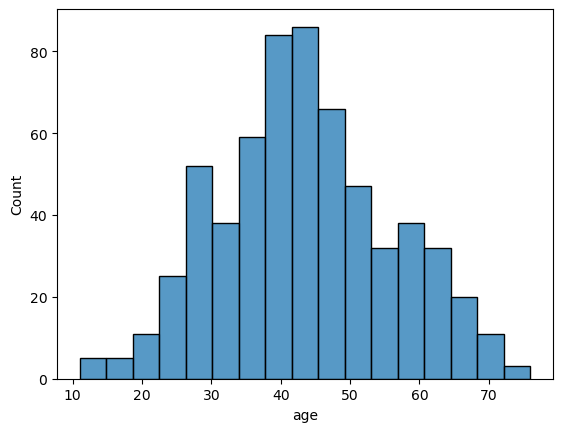

In [39]:
## bin age and survival days because they are continuous variables

## examine distribution of data to determine appropriate bins

import seaborn as sns
import matplotlib as plt

sns.histplot(x = 'age',data=df_2)


<Axes: xlabel='survival_days', ylabel='Count'>

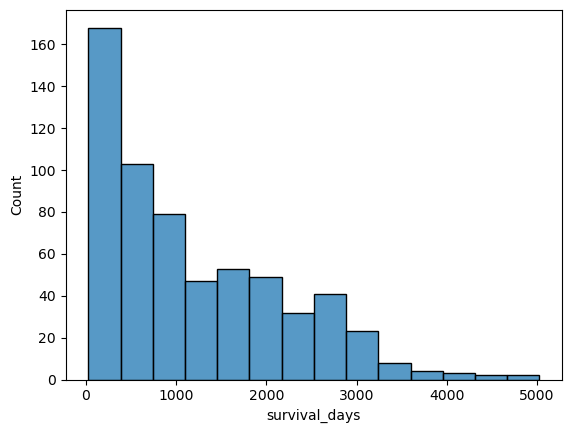

In [40]:
sns.histplot(x = 'survival_days',data=df_2)


In [41]:
age_bins = [10, 20, 30, 40, 50, 60, 70,80]

# Create bin labels
age_labels = ['10-20', '21-30', '31-40', '41-50','51-60','61-70','71-80']

# Bin the 'values' column
df_2['age'] = pd.cut(df['age'], bins = age_bins, labels=age_labels, right=False)


df_2['survival_days'] = pd.to_numeric(df_2['survival_days']) / 365

df_2.head()




,tumor_type,tumor_histology,tumor_grade,gender,age,survival_days,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,primary tumor,anaplastic astrocyma,grade 3,Female,41-50,0.835616,deceased,radiation recieved,chemotherapy recieved,Wildtype,Non-codel
1,primary tumor,oligodendroglioma,grade 2,Female,41-50,10.457534,alive,no radiation received,chemotherapy recieved,Mutant,Codel
2,primary tumor,astrocytoma,grade 2,Male,41-50,0.673973,deceased,radiation recieved,chemotherapy recieved,Mutant,Non-codel
3,recurrent tumor,oligodendroglioma,grade 2,Male,41-50,10.079452,deceased,radiation recieved,chemotherapy recieved,Mutant,Non-codel
4,primary tumor,astrocytoma,grade 2,Male,41-50,0.720548,deceased,no radiation received,chemotherapy recieved,Wildtype,Non-codel


In [42]:
survival_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Create bin labels
survival_labels = ['0-1.0 yrs', '1.01 - 2.0 yrs', '2.01 - 3.0 yrs', '3.01 - 4.0 yrs','4.01 - 5.0 yrs',
                   '5.01 - 6.0 yrs','6.01 - 7.0 yrs','7.01 - 8.0 yrs','8.01 - 9.0 yrs','9.01 - 10.0 yrs',
                   '10.01 - 11.0 yrs', '11.01 - 12.0 yrs', '12.01 - 13.0 yrs', '13.01 - 14.0 yrs','14.01 - 15 yrs']

# Bin the 'values' column
df_2['survival_days'] = pd.cut(df_2['survival_days'], bins = survival_bins, labels=survival_labels, right=False)

df_2.head()

,tumor_type,tumor_histology,tumor_grade,gender,age,survival_days,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,primary tumor,anaplastic astrocyma,grade 3,Female,41-50,0-1.0 yrs,deceased,radiation recieved,chemotherapy recieved,Wildtype,Non-codel
1,primary tumor,oligodendroglioma,grade 2,Female,41-50,10.01 - 11.0 yrs,alive,no radiation received,chemotherapy recieved,Mutant,Codel
2,primary tumor,astrocytoma,grade 2,Male,41-50,0-1.0 yrs,deceased,radiation recieved,chemotherapy recieved,Mutant,Non-codel
3,recurrent tumor,oligodendroglioma,grade 2,Male,41-50,10.01 - 11.0 yrs,deceased,radiation recieved,chemotherapy recieved,Mutant,Non-codel
4,primary tumor,astrocytoma,grade 2,Male,41-50,0-1.0 yrs,deceased,no radiation received,chemotherapy recieved,Wildtype,Non-codel


In [ ]:
## export csv file with no column names

df_2.to_csv("cgga_clinical_for_arm.csv", header = False, index=False)